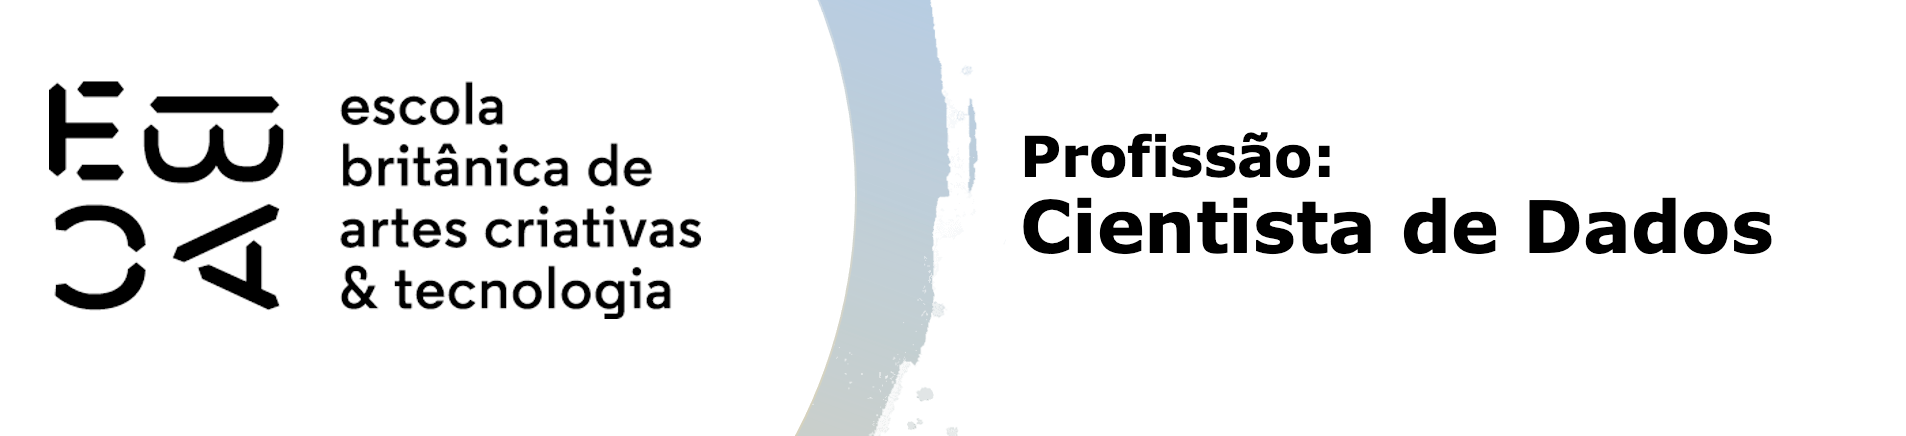

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as pf

from sklearn.cluster       import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial         import distance
from sklearn.metrics       import silhouette_score
from tqdm.notebook         import tqdm
from sklearn.decomposition import PCA

In [89]:
df = pd.read_csv(r"C:\Users\Positivo\Desktop\Cursos\Curso Ciencias de dados Ebac\Ciencias de dados\Módulo29-K-means\online_shoppers_intention.csv")

df.sample(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1178,0,0.000000,0,0.0,12,207.000000,0.000000,0.036667,0.0,0.0,Mar,2,2,3,2,Returning_Visitor,False,False
12053,6,146.416667,0,0.0,61,2405.652778,0.009375,0.032135,0.0,0.0,Dec,2,1,1,2,Returning_Visitor,False,True


In [90]:
df.Revenue.value_counts(dropna=False)

False    10422
True      1908
Name: Revenue, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [3]:
print(df.shape)
df.info()

(12330, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficTyp

In [4]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
numericos = df.select_dtypes(include=[int,float])
categoricos = df.select_dtypes(exclude=[int,float])

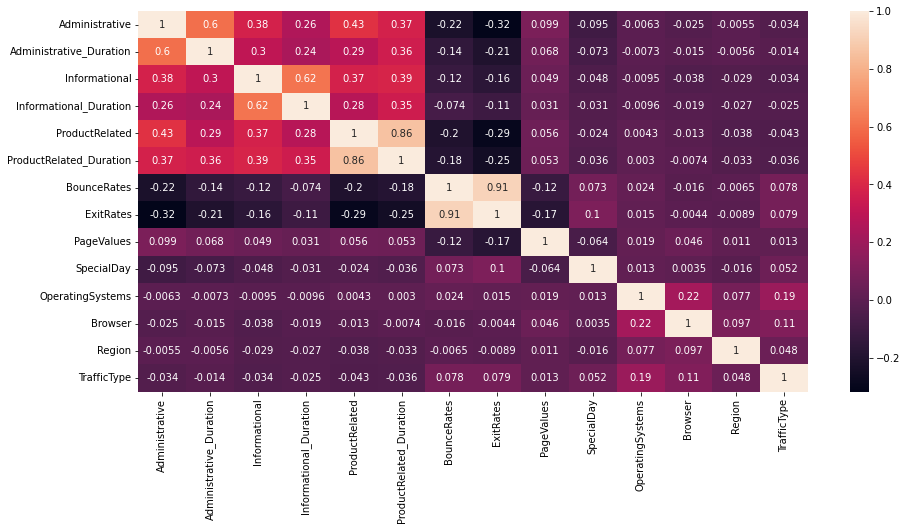

In [9]:
plt.figure(figsize=[15,7])
sns.heatmap(numericos.corr(), annot=True)
plt.show()

In [74]:
numericos.describe()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [78]:
categoricos.sample(5)

,Month,VisitorType,Weekend,Revenue
4054,May,Returning_Visitor,True,False
1111,Mar,New_Visitor,False,False
3869,May,Returning_Visitor,True,True
3106,May,Returning_Visitor,True,False
1217,Mar,New_Visitor,True,False


In [27]:
categoricos["VisitorType"].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [29]:
categoricos["VisitorType"].value_counts(normalize=True) * 100

Returning_Visitor    85.571776
New_Visitor          13.738848
Other                 0.689376
Name: VisitorType, dtype: float64

In [30]:
categoricos["Weekend"].value_counts(normalize=True) * 100

False    76.739659
True     23.260341
Name: Weekend, dtype: float64

In [31]:
categoricos["Revenue"].value_counts(normalize=True) * 100

False    84.525547
True     15.474453
Name: Revenue, dtype: float64

In [91]:
df1 = df.copy()

In [93]:
df1.sample(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4996,0,0.0,0,0.0,30,586.533333,0.000000,0.003448,30.877241,0.2,May,2,2,2,2,New_Visitor,False,True
1502,0,0.0,0,0.0,7,110.000000,0.057143,0.142857,0.000000,0.0,Mar,3,2,8,1,Returning_Visitor,False,False
4773,0,0.0,0,0.0,4,880.000000,0.000000,0.050000,0.000000,0.0,May,2,2,7,1,Returning_Visitor,True,False


In [94]:
df1["Weekend"] = df1["Weekend"].map({False:"Nao", True:"Sim"})
df1["Revenue"] = df1["Revenue"].map({False:"Nao", True:"Sim"})

In [95]:
df1.sample(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
7503,2,172.4,3,134.0,15,569.493333,0.0,0.025000,0.0,0.0,Sep,2,2,1,2,Returning_Visitor,Sim,Nao
445,3,279.0,0,0.0,0,0.000000,0.0,0.050000,0.0,0.0,Mar,3,2,1,10,Returning_Visitor,Sim,Nao
8822,1,40.5,0,0.0,7,170.000000,0.0,0.016667,0.0,0.0,Dec,2,4,1,2,Returning_Visitor,Nao,Nao


## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [46]:
df1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [97]:
variaveis = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']



In [98]:
df2 = df1.copy()

In [99]:
SQD = []
K =range(2,15)
for k in tqdm(K):
    km = KMeans(n_clusters=k)
    km = km.fit(df2[variaveis])
    SQD.append(km.inertia_)

  0%|          | 0/13 [00:00<?, ?it/s]

<AxesSubplot:xlabel='numero_cluster'>

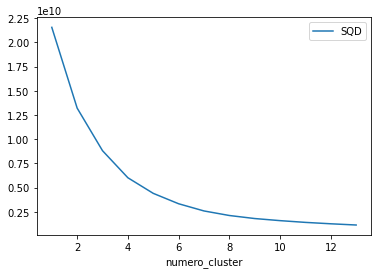

In [100]:
df3 = pd.DataFrame({"numero_cluster": list(range(1 , len(SQD)+1)) , "SQD": SQD})

df3.plot(x="numero_cluster" , y="SQD")

In [101]:
siluetas = []

max_clusters = 10


for n_clusters in tqdm(range(2, max_clusters+1)):
    # Aqui rodamos o k-means
    km = KMeans(n_clusters=n_clusters).fit(df2[variaveis])
    # Aqui calculamos a silueta e guardamos o resultado na lista 'siluetas'
    siluetas.append(silhouette_score(df2[variaveis], km.labels_))
    # Essa list comprehendion define o nome dos grupos
    nomes_grupos = ['grupo_' + str(g) for g in range(n_clusters)]
    # Agora vamos adicionar uma coluna no dataframe X_pad com o agrupamento construido
    df2['grupos_'+str(n_clusters)] = pd.Categorical.from_codes(km.labels_, categories = nomes_grupos)

  0%|          | 0/9 [00:00<?, ?it/s]

<AxesSubplot:xlabel='n_clusters'>

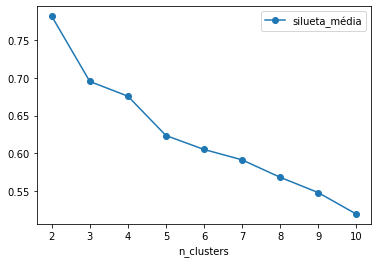

In [102]:

df_silueta = pd.DataFrame({'n_clusters': list(range(2, max_clusters+1)), 'silueta_média': siluetas})

df_silueta.plot.line(x = 'n_clusters', y = 'silueta_média', marker='o')
# plt.scatter(x = df_silueta.n_clusters, y = df_silueta.silueta_média)

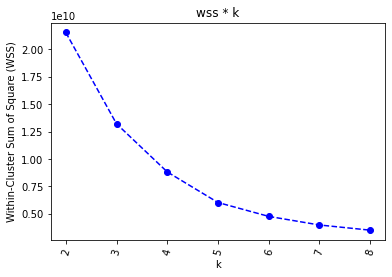

CPU times: total: 9.12 s
Wall time: 5.47 s


In [104]:
%%time
clusters = range(2,9)


wss = []
for k in clusters:
    # Definicao do modelo
    kmeans = KMeans(init="random" , n_clusters=k , n_init=10 , max_iter=300 ,random_state=42 )
    
    # Treinamento do modelo
    kmeans.fit(df2[variaveis])
    # Validation
    
    wss.append(kmeans.inertia_)
    
plt.plot(clusters, wss , linestyle="--" , color="b"  , marker="o")  
plt.xlabel("k")
plt.ylabel("Within-Cluster Sum of Square (WSS)")
plt.xticks(rotation="75")
plt.title("wss * k")
plt.show()

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

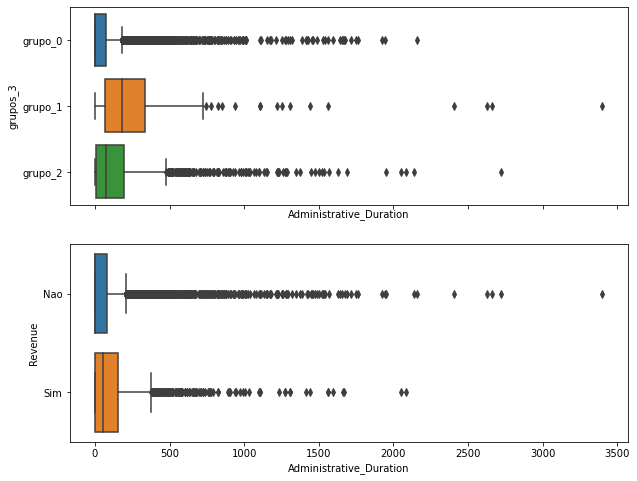

In [109]:
def datavis_grupos(varx , varg):
    fig , ax = plt.subplots(2 , 1 , sharex=True , figsize=[10,8])
    
    sns.boxplot(data=df2 , y = varg , x = varx , ax=ax[0])
    sns.boxplot(data=df1  , y = "Revenue"  , x = varx  , ax=ax[1])
    
    plt.show()

datavis_grupos(variaveis[1],"grupos_3" )

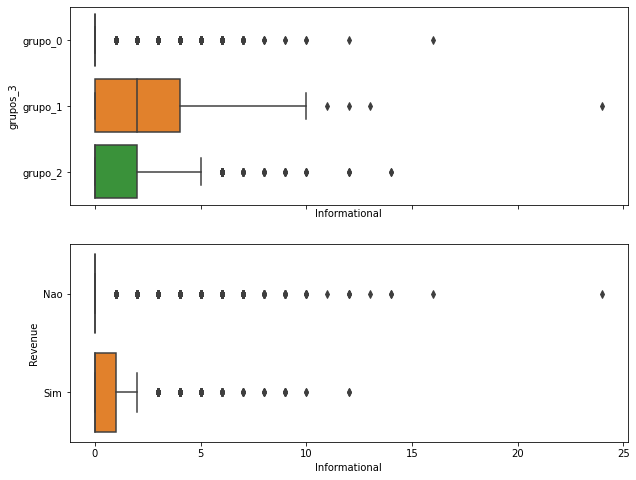

In [110]:
def datavis_grupos(varx , varg):
    fig , ax = plt.subplots(2 , 1 , sharex=True , figsize=[10,8])
    
    sns.boxplot(data=df2 , y = varg , x = varx , ax=ax[0])
    sns.boxplot(data=df1  , y = "Revenue"  , x = varx  , ax=ax[1])
    
    plt.show()

datavis_grupos(variaveis[2],"grupos_3" )

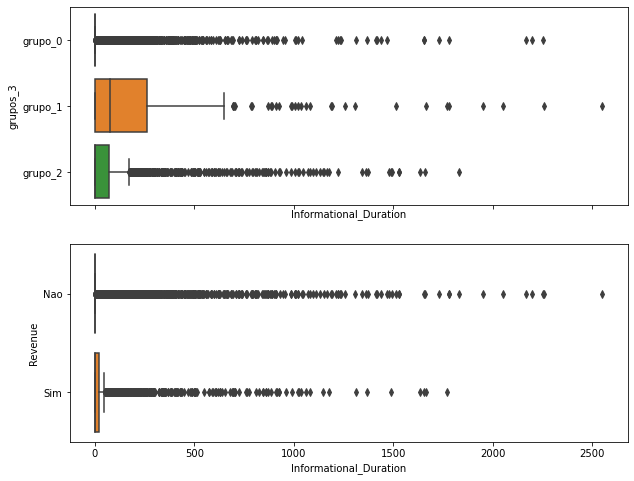

In [111]:
def datavis_grupos(varx , varg):
    fig , ax = plt.subplots(2 , 1 , sharex=True , figsize=[10,8])
    
    sns.boxplot(data=df2 , y = varg , x = varx , ax=ax[0])
    sns.boxplot(data=df1  , y = "Revenue"  , x = varx  , ax=ax[1])
    
    plt.show()

datavis_grupos(variaveis[3],"grupos_3" )

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [119]:
y = df1["Revenue"]

df2["y"] = y

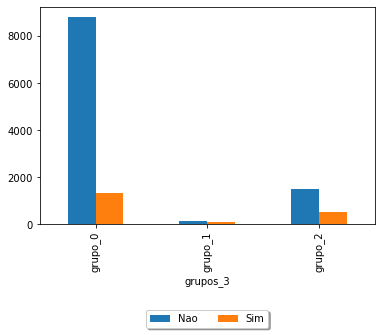

In [135]:
ax = df2.groupby(["grupos_3","y"])["y"].count().unstack().plot.bar()

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True);  # Ajeita e centraliza o grafico

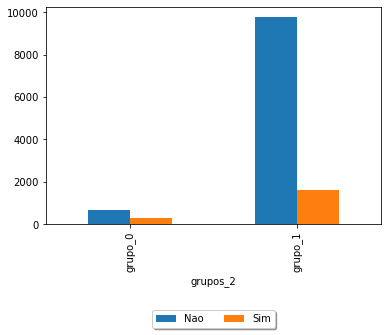

In [136]:
ax = df2.groupby(["grupos_2","y"])["y"].count().unstack().plot.bar()

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True);  # Ajeita e centraliza o grafico

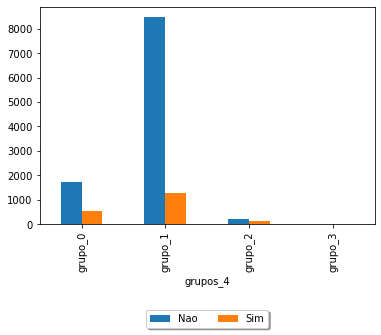

In [122]:
ax = df2.groupby(["grupos_4","y"])["y"].count().unstack().plot.bar()

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True);  # Ajeita e centraliza o grafico

In [123]:
pd.crosstab(df2['y'], df2['grupos_2'])

grupos_2,grupo_0,grupo_1
y,,
Nao,650,9772
Sim,283,1625


In [124]:
pd.crosstab(df2['y'], df2['grupos_3'])

grupos_3,grupo_0,grupo_1,grupo_2
y,,,
Nao,8805,137,1480
Sim,1342,70,496


In [121]:
pca = PCA(n_components=2)
componentes = pca.fit_transform(df2[variaveis])

In [125]:
def biplot(score,coeff, y, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 2/(xs.max() - xs.min())
    scaley = 2/(ys.max() - ys.min())
    
    fig, ax = plt.subplots(figsize=(10, 10))
#     scatter = ax.scatter(xs * scalex,ys * scaley, c = y)
    sns.kdeplot(x = xs * scalex, y = ys * scaley, hue=y, ax=ax, fill=True, alpha=.6, palette='viridis')
#     ax.legend(*scatter.legend_elements())
    
    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5, 
                 length_includes_head=True, head_width=0.04, head_length=0.04)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'k', ha = 'center', va = 'center')
    ax.set_xlim(-1.2,1.2)
    ax.set_ylim(-1.2,1.2)
    ax.set_xlabel("PC{0}, {1:.1%} da variância explicada".format(1, pca.explained_variance_ratio_[0]))
    ax.set_ylabel("PC{0}, {1:.1%} da variância explicada".format(1, pca.explained_variance_ratio_[1]))
    ax.grid()




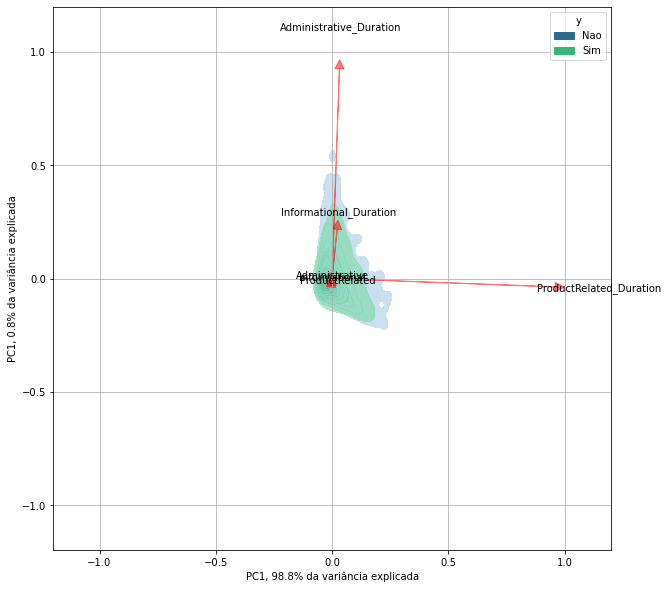

In [126]:
biplot(componentes,
       np.transpose(pca.components_[0:2, :]), 
       df2['y'],
       labels = variaveis)
plt.show()

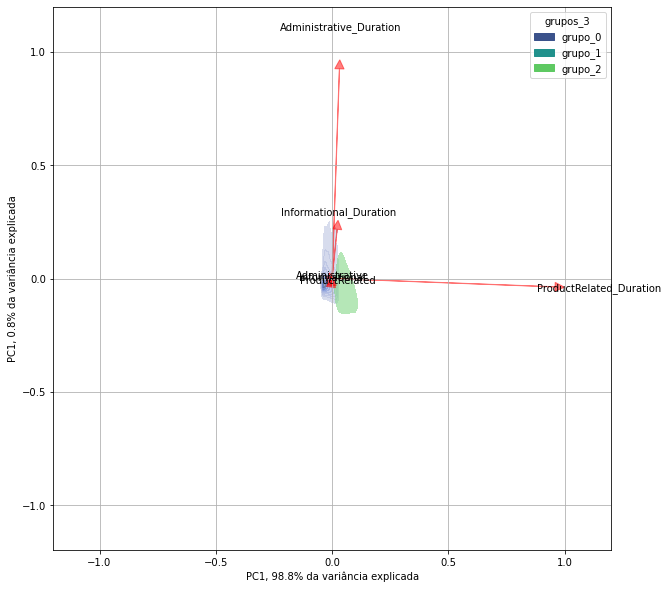

In [127]:
biplot(componentes,
       np.transpose(pca.components_[0:2, :]), 
       df2['grupos_3'],
       labels = variaveis)
plt.show()

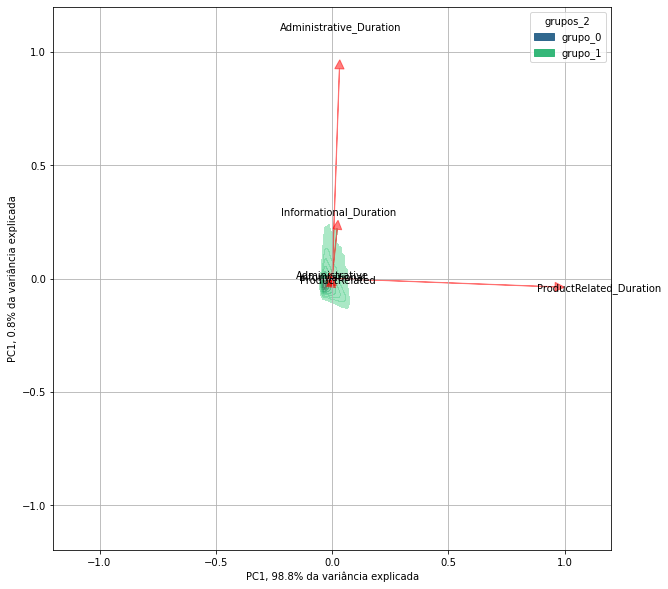

In [128]:
biplot(componentes,
       np.transpose(pca.components_[0:2, :]), 
       df2['grupos_2'],
       labels = variaveis)
plt.show()

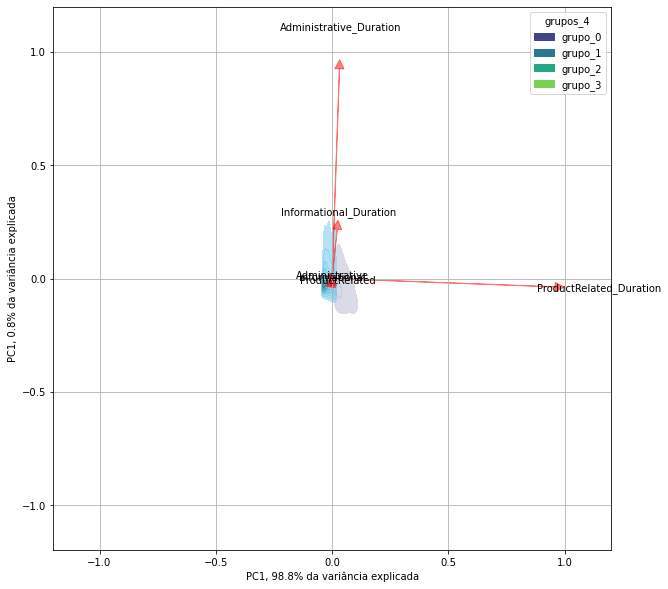

In [129]:
biplot(componentes,
       np.transpose(pca.components_[0:2, :]), 
       df2['grupos_4'],
       labels = variaveis)
plt.show()

- Na minha opmião a divião em 2 grupos é a melhor opção para a explicação sobre se o cliente realizou a compra ou não. 
- Fora que os dados não estão balanceando e isso acaba influenciando na analise.

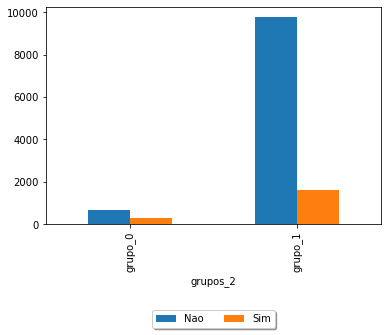

In [137]:
ax = df2.groupby(["grupos_2","y"])["y"].count().unstack().plot.bar()

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True);  # Ajeita e centraliza o grafico

In [138]:
pd.crosstab(df2['y'], df2['grupos_2']).reset_index()

grupos_2,y,grupo_0,grupo_1
0,Nao,650,9772
1,Sim,283,1625
